In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from utils import prim

We create n nodes with random positions between -100 and 100

In [2]:
rng = np.random.default_rng(0)
n = 10
nodes = np.array(range(1, n+1))
positions = rng.random((n, 2))
positions = positions*200 - 100
print(nodes)
print(positions)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 27.39233746 -46.04265725]
 [-91.80529521 -96.69447289]
 [ 62.65404784  82.55111546]
 [ 21.32715515  45.8993122 ]
 [  8.72499829  87.01448476]
 [ 63.17071082 -99.45229997]
 [ 71.48085532 -93.28288494]
 [ 45.93108929 -64.86887588]
 [ 72.63578447   8.29224405]
 [-40.05762189 -15.46255576]]


Here what it looks like without edges

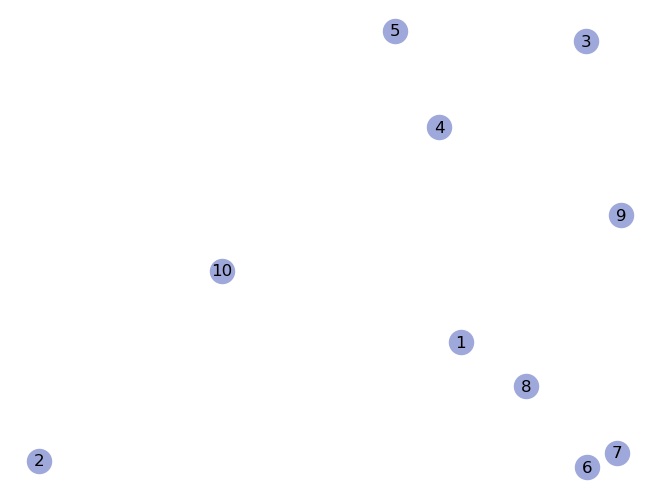

In [3]:
G = nx.DiGraph()
for i in range(len(nodes)):
    G.add_node(nodes[i], pos=positions[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='#9FA8DA')


We create the dist to serve as the weight for the edges

In [4]:
dist = dict()
for node in nodes:
    dist[node] = dict()
for i in range(len(nodes)):
    dist[nodes[i]][nodes[i]] = 0.0
    for j in range(i+1, len(nodes)):
        dist[nodes[i]][nodes[j]] = np.linalg.norm(positions[i] - positions[j])
        dist[nodes[j]][nodes[i]] = dist[nodes[i]][nodes[j]]

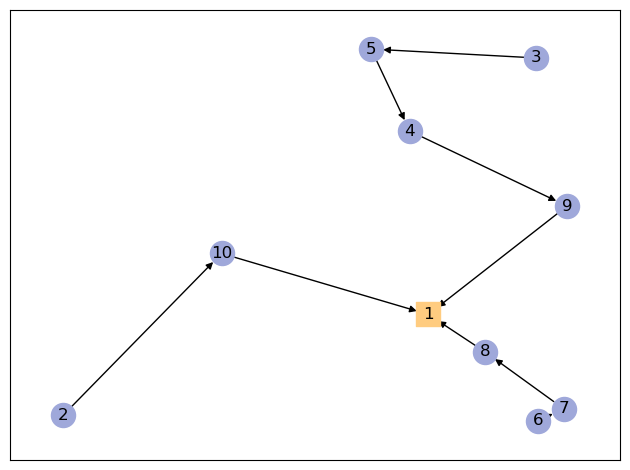

In [5]:
starting_node = 1
edges = prim(nodes, dist, starting_node)
G.add_edges_from(edges)
nx.draw_networkx_nodes(G, pos, nodelist=[starting_node], node_color='#FFCC80', node_shape='s')
nodelist = [node for node in nodes]
nodelist.remove(starting_node)
nx.draw_networkx_nodes(G, pos, nodelist, node_color='#9FA8DA')
nx.draw_networkx_edges(G, pos, edgelist=edges)
nx.draw_networkx_labels(G, pos)
plt.tight_layout()
plt.show()